## Data Loading and Exploration

In [1]:
import pandas as pd
df = pd.read_csv('data\Clean_Dataset.csv')
df = df
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

## Data Preprocessing

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)
df = df.join(pd.get_dummies(df['airline'], prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city'], prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='destination')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df['departure_time'], prefix='departure')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df['arrival_time'], prefix='arrival')).drop('arrival_time', axis=1)
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['stops'] = pd.factorize(df.stops)[0]
df = df.astype(int)

In [5]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting the Data

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=25, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",25
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

## Evaluating the Model

In [9]:
model.score(X_test, y_test)

0.9751332873623606

In [11]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12818349.56663418
Root Mean Squared Error: 3580.27227548886
Mean Absolute Error: 1502.863991923389
R^2 Score: 0.9751332873623606


## Visualizing Errors

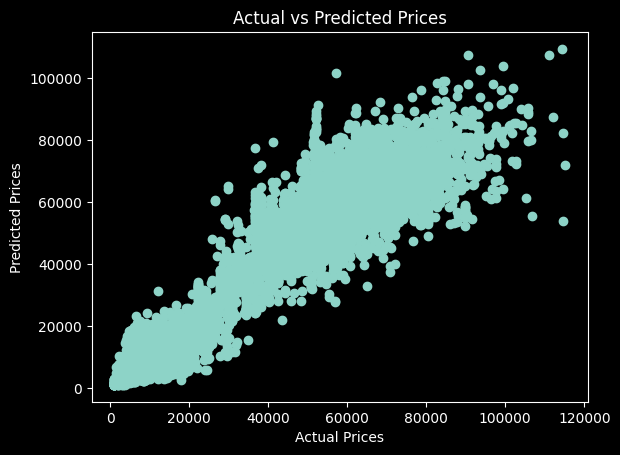

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Giving new Data

In [14]:
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
X_test

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
27131,1,0,19,40,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
266857,1,1,9,42,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
141228,1,0,10,41,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
288329,1,1,14,14,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
97334,1,0,8,20,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,1,0,12,27,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5591,0,0,2,29,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
168314,1,0,13,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
175191,0,0,2,40,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [19]:
prediction = model.predict(X_test)
print(f'Predicted Price: {prediction[0]}')

Predicted Price: 7262.92
